<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-формулу-вычисления-эффективности-обогащения" data-toc-modified-id="Проверим-формулу-вычисления-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим формулу вычисления эффективности обогащения</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Проведем-предобработку-данных" data-toc-modified-id="Проведем-предобработку-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проведем предобработку данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследуем-изменение-концентрации-элементов-на-каждом-этапе" data-toc-modified-id="Исследуем-изменение-концентрации-элементов-на-каждом-этапе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем изменение концентрации элементов на каждом этапе</a></span></li><li><span><a href="#Проанализируем-распределения-размеров-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Проанализируем-распределения-размеров-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проанализируем распределения размеров гранул на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарные-концентрации" data-toc-modified-id="Исследуем-суммарные-концентрации-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарные концентрации</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке.-Опишим-выводы." data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке.-Опишим-выводы.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. Опишим выводы.</a></span></li></ul>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


## Подготовка данных

Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Загрузим датасеты

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Посмотрим на данные

In [3]:
def heads(data):
    print('*******************************************head************************************************')
    print(data.head())
    return data
sets = [data_train, data_test, data_full]
for s in sets:
    heads(s)

*******************************************head************************************************
                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629

In [4]:
def infos(data):    
    print('*******************************************info*************************************************')
    data.info()
    return data
for s in sets:
    infos(s)

*******************************************info*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 no

### Проверим формулу вычисления эффективности обогащения

In [5]:
data_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Создадим выборку из данных, необходимых для проверки формулы. Данные связаны с этапом флотации - rougher.

In [6]:
recovery_au = data_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.recovery']]

Напишем функцию для расчета эффективности и сравним с данной эффективностью в сете

In [7]:
def recovery_a(row):
    c = row['rougher.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']
    recovery = ((c*(f-t)) / (f*(c-t))) * 100
    return recovery

C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

In [8]:
recovery_au['recovery_au']=recovery_a(recovery_au)

In [9]:
mean_absolute_error(recovery_au['recovery_au'], recovery_au['rougher.output.recovery'])

9.73512347450521e-15

Полученное значение MSE свидетельствует о маленькой разнице между расчетными и данными значениями. Данные значения верны.

### Проанализируем признаки, недоступные в тестовой выборке.

In [10]:
column_train = data_train.columns
column_test = data_test.columns
for i in column_train:
    if i not in column_test:
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В тестовой выборке недоступны признаки этапов:
1. Флотации
* Расчетные характеристики
* Концентрации ag, pb, sol, au
* Концентрации ag, pb, sol, au в отвальных хвостах
* Эффективности обогащения
2. Первичной очистки
* Концентрации ag, pb, sol, au
* Концентрации ag, pb, sol, au в отвальных хвостах
3. Вторичной очистки
* Концентрации ag, pb, sol, au в отвальных хвостах
4. Финальной характеристики
* Концентрации ag, pb, sol, au
* Концентрации ag, pb, sol, au в отвальных хвостах
* Эффективности обогащения        

### Проведем предобработку данных

Датасеты необходимо приветси к "общему знаменателю", добавить и удалить недостающие столбцы теста и трейна. Пропущенные значения или заменим медианной по столбцу, или удалим (при их небольшом количестве)

Добавим в тестовую выборку целевые признаки из исходных данных, по столбцу date

In [11]:
targets = ['rougher.output.recovery', 'final.output.recovery']

In [12]:
df_test = data_test
df_full = data_full
df_test = pd.concat([df_test, df_full.loc[df_test.index][targets]], axis=1)


In [13]:
df_full.dropna(subset=targets, inplace=True)


In [14]:
# df_full.dropna(subset=targets, inplace=True)
df_test.dropna(subset=targets, inplace=True)

In [15]:
# df_full.dropna(subset=targets, inplace=True)
data_train.dropna(subset=targets, inplace=True)

По условию задачи. *Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.*
Поэтому будем приводить трейн к "общему знаменателю" теста

In [16]:
df_train = data_train[df_test.columns]

In [17]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = data_full.fillna(method='ffill')

Удалим ненужный столбец

In [18]:
df_train = df_train.drop("date", axis=1)
df_test = df_test.drop("date", axis=1)
df_full = df_full.drop("date", axis=1)

## Анализ данных

### Исследуем изменение концентрации элементов на каждом этапе

(Au, Ag, Pb)

In [19]:
concentrate = df_full[['rougher.output.concentrate_ag', 
           'rougher.output.concentrate_pb', 
           'rougher.output.concentrate_au', 
           'primary_cleaner.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_pb', 
           'primary_cleaner.output.concentrate_au', 
           'final.output.concentrate_ag', 
           'final.output.concentrate_pb', 
           'final.output.concentrate_au']]

concentrate.rename(columns={'rougher.output.concentrate_ag' : 'концентрат флотации ag', 
           'rougher.output.concentrate_pb' : 'концентрат флотации pb', 
           'rougher.output.concentrate_au' : 'концентрат флотации au', 
           'primary_cleaner.output.concentrate_ag' : 'концентрат первичной очистки ag', 
           'primary_cleaner.output.concentrate_pb' : 'концентрат первичной очистки pb', 
           'primary_cleaner.output.concentrate_au' : 'концентрат первичной очистки au', 
           'final.output.concentrate_ag' : 'финальный концентрат ag', 
           'final.output.concentrate_pb' : 'финальный концентрат pb', 
           'final.output.concentrate_au' : 'финальный концентрат au'}, inplace=True)


<AxesSubplot:>

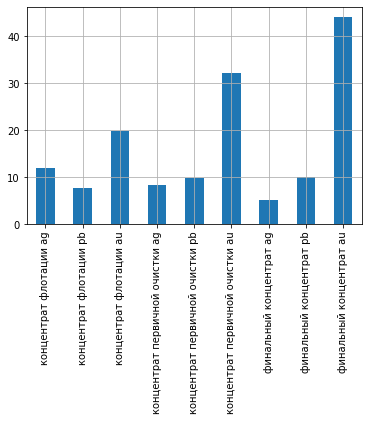

In [20]:
concentrate.mean().plot(kind = 'bar', grid = True)

Концентрация серебра падает с каждым этапом. Концентрация свинца вырастает после первого этапа и не изменяется на втором и третьем. Концентрация золота интенсивно растет с каждым этапом. 

 ### Проанализируем распределения размеров гранул на обучающей и тестовой выборках

<AxesSubplot:title={'center':'Распределение размеров гранул сырья на этапе первичной очистки'}, xlabel='Размер гранул сырья', ylabel='Количество'>

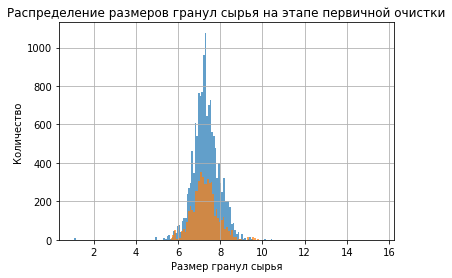

In [21]:
df_train['primary_cleaner.input.feed_size'].hist(bins=120, alpha=.7)
plt.title('Распределение размеров гранул сырья на этапе первичной очистки')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество')
df_test['primary_cleaner.input.feed_size'].hist(bins=120, alpha=.7)


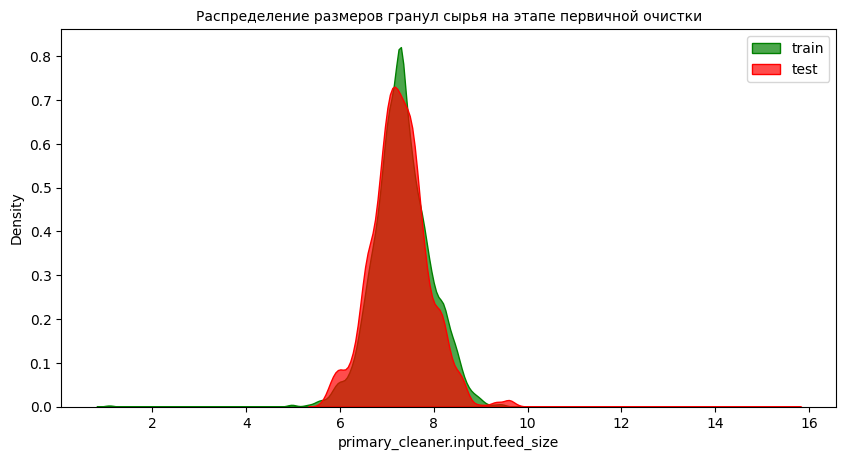

In [22]:
plt.figure(figsize=(10,5), dpi= 100)
sns.kdeplot(df_train['primary_cleaner.input.feed_size'], shade=True, color="g", label="train", alpha=.7)
sns.kdeplot(df_test['primary_cleaner.input.feed_size'], shade=True, color="r", label="test", alpha=.7)

plt.title('Распределение размеров гранул сырья на этапе первичной очистки', fontsize=10)
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Распределение размеров гранул сырья на этапе флотации'}, xlabel='Размер гранул сырья', ylabel='Количество'>

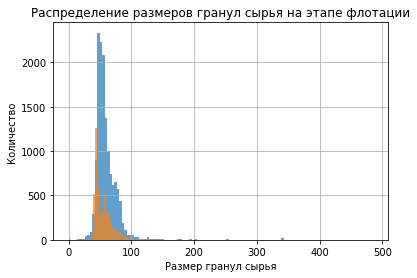

In [23]:
df_train['rougher.input.feed_size'].hist(bins=120, alpha=.7)
plt.title('Распределение размеров гранул сырья на этапе флотации')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество')
df_test['rougher.input.feed_size'].hist(bins=120, alpha=.7)

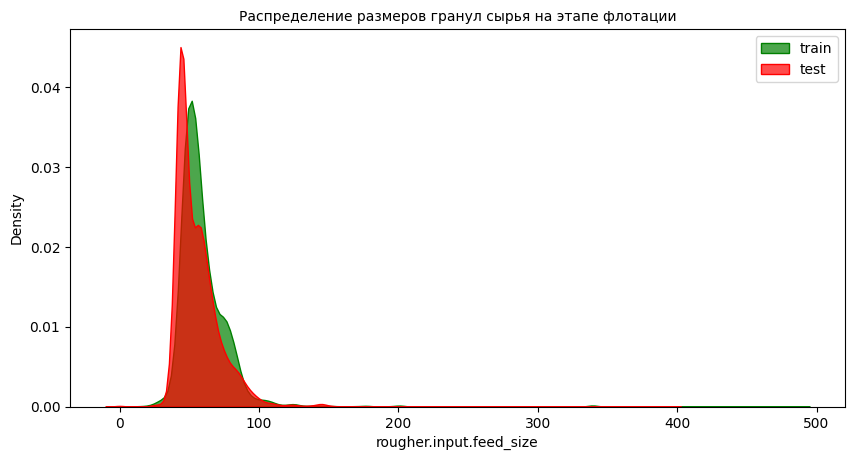

In [24]:
plt.figure(figsize=(10,5), dpi= 100)
sns.kdeplot(df_train['rougher.input.feed_size'], shade=True, color="g", label="train", alpha=.7)
sns.kdeplot(df_test['rougher.input.feed_size'], shade=True, color="r", label="test", alpha=.7)

plt.title('Распределение размеров гранул сырья на этапе флотации', fontsize=10)
plt.legend()
plt.show()

Распределения размеров похожие, несильно различаются. Оценка модели будет правильная

### Исследуем суммарные концентрации

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [25]:
df_full_sum = df_full[['rougher.input.feed_ag', 
    'rougher.input.feed_pb', 
    'rougher.input.feed_sol', 
    'rougher.input.feed_au', 
    'rougher.output.concentrate_ag', 
    'rougher.output.concentrate_pb', 
    'rougher.output.concentrate_sol', 
    'rougher.output.concentrate_au', 
    'final.output.concentrate_ag', 
    'final.output.concentrate_pb', 
    'final.output.concentrate_sol', 
    'final.output.concentrate_au']]
df_full_sum['rougher.input.feed'] = df_full_sum['rougher.input.feed_ag'] + df_full_sum['rougher.input.feed_pb'] + df_full_sum['rougher.input.feed_sol'] + df_full_sum['rougher.input.feed_au'] 
df_full_sum['rougher.output.concentrate'] = df_full_sum['rougher.output.concentrate_ag'] + df_full_sum['rougher.output.concentrate_pb'] + df_full_sum['rougher.output.concentrate_sol'] + df_full_sum['rougher.output.concentrate_au'] 
df_full_sum['final.output.concentrate'] = df_full_sum['final.output.concentrate_ag'] + df_full_sum['final.output.concentrate_pb'] + df_full_sum['final.output.concentrate_sol'] + df_full_sum['final.output.concentrate_au'] 

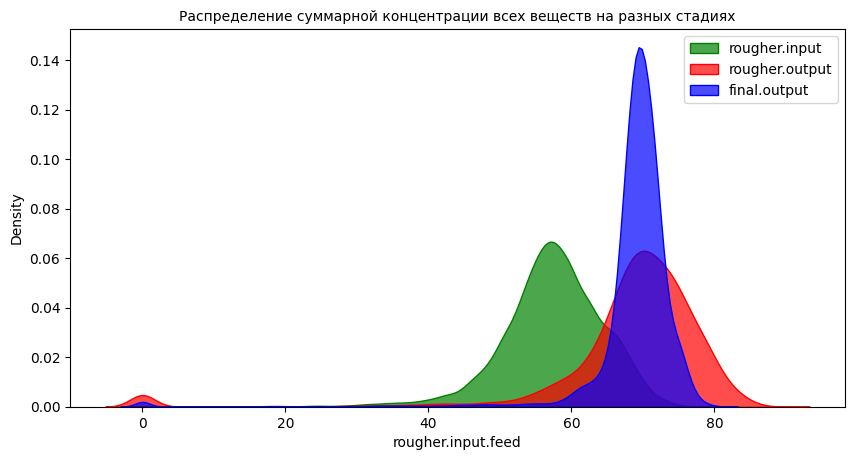

In [26]:
plt.figure(figsize=(10,5), dpi= 100)
sns.kdeplot(df_full_sum['rougher.input.feed'], shade=True, color="g", label="rougher.input", alpha=.7)
sns.kdeplot(df_full_sum['rougher.output.concentrate'], shade=True, color="r", label="rougher.output", alpha=.7)
sns.kdeplot(df_full_sum['final.output.concentrate'], shade=True, color="b", label="final.output", alpha=.7)

plt.title('Распределение суммарной концентрации всех веществ на разных стадиях', fontsize=10)
plt.legend()
plt.show()

Text(0.5, 0, 'Концентрация вещества')

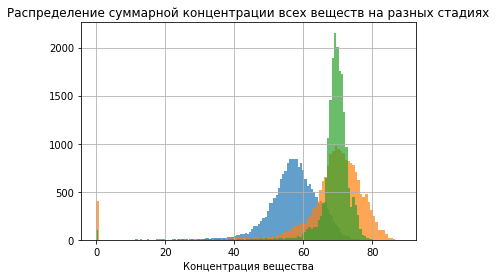

In [27]:
df_full_sum['rougher.input.feed'].hist(bins=120, alpha=.7)
df_full_sum['rougher.output.concentrate'].hist(bins=120, alpha=.7)
df_full_sum['final.output.concentrate'].hist(bins=120, alpha=.7)
plt.title('Распределение суммарной концентрации всех веществ на разных стадиях')
plt.xlabel('Концентрация вещества')

На графике видны значениия выборки, близкие к нулю, считаем их выбросами. На финальном этапе концентрация плотнее и находится в пределах 60-80, чем на сырье и черновом этапе

In [28]:
non_nulls_fulls = df_full_sum.loc[df_full_sum['rougher.input.feed'] > 20]
non_nulls_fulls = non_nulls_fulls.loc[non_nulls_fulls['rougher.output.concentrate'] > 20]
non_nulls_fulls = non_nulls_fulls.loc[non_nulls_fulls['final.output.concentrate'] > 20]

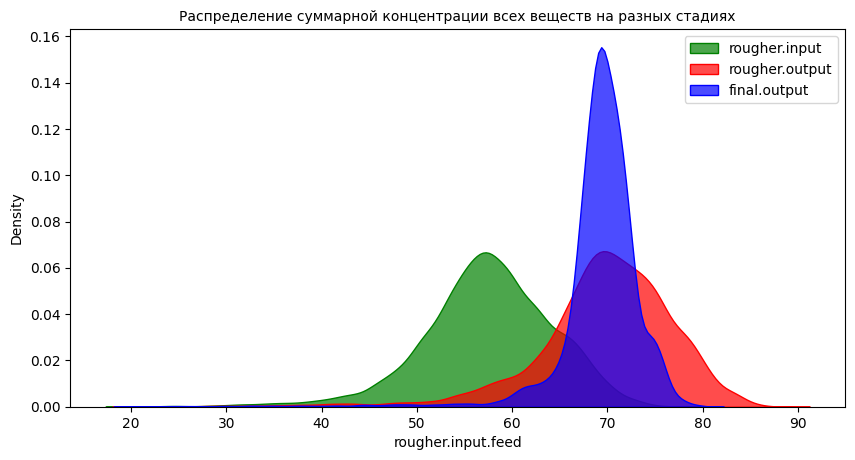

In [29]:
plt.figure(figsize=(10,5), dpi= 100)
sns.kdeplot(non_nulls_fulls['rougher.input.feed'], shade=True, color="g", label="rougher.input", alpha=.7)
sns.kdeplot(non_nulls_fulls['rougher.output.concentrate'], shade=True, color="r", label="rougher.output", alpha=.7)
sns.kdeplot(non_nulls_fulls['final.output.concentrate'], shade=True, color="b", label="final.output", alpha=.7)

plt.title('Распределение суммарной концентрации всех веществ на разных стадиях', fontsize=10)
plt.legend()
plt.show()

## Модель

### Напишем функцию для вычисления итоговой sMAPE.

Функция sMAPE

In [30]:
def scorer(estimator, X, y):
    predict = estimator.predict(X)

    return 1 / len(y) * sum( abs(y - predict) / ( (abs(y) + abs(predict)) * 0.5) ) * 100

In [31]:
def smape(y, x):
     return 1 / len(y) * sum( abs(y - x) / ( (abs(y) + abs(x)) * 0.5) ) * 100

Функция итоговое sMAPE

In [32]:
 def final_smape(smape_rougher, smape_final):
    f_smp = (0.25 * smape_rougher) + (0.75 * smape_final)
    return f_smp

### Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. Опишим выводы.

Для начала уберем значения таргетов меньше 20

In [33]:
df_test = df_test[(df_test['rougher.input.feed_au'] > 5) & 
                  (df_test['rougher.input.feed_sol'] > 5) & 
                  (df_test['rougher.input.feed_pb'] > 5) & 
                  (df_test['rougher.input.feed_ag'] > 5)]

In [34]:
df_train = df_train[(df_train['rougher.input.feed_au'] > 5) & 
                  (df_train['rougher.input.feed_sol'] > 5) & 
                  (df_train['rougher.input.feed_pb'] > 5) & 
                  (df_train['rougher.input.feed_ag'] > 5)]

Оставляем только те строки, в которых нет выбросов, выявленных в пункте 2.3, фильтруя по целевым признакам.

Принято решение ввести границу выбросов 5, вместо 20, тк при 20 данных становится мало или они совсем пропадают*

Определим фичи и таргеты тренировочной выборки

In [35]:
features_train = df_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']

In [36]:
features1 = features_train.drop(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'],axis=1)
features2 = features_train.drop(['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level'],axis=1)


Выровняем данные

In [37]:
scaler1 = StandardScaler()
scaler1.fit(features1)
features1 = scaler1.transform(features1)
scaler2 = StandardScaler()
scaler2.fit(features2)
features2 = scaler2.transform(features2)

Проверим модели кросс-валидации

In [38]:
for i in range(1,10):   
    model_tree = DecisionTreeRegressor(max_depth=i)

    scores_tree=cross_val_score(model_tree, features1, target_train_rougher, cv=5, scoring = scorer)

    scores_tree2=cross_val_score(model_tree, features2, target_train_final, cv=5, scoring = scorer)
    
    print(f'модель DecisionTreeRegressor max_depth = {i}:')
    
    print('Средняя оценка качества модели:', scores_tree.mean())

    print('Средняя оценка качества модели:', scores_tree2.mean())

модель DecisionTreeRegressor max_depth = 1:
Средняя оценка качества модели: 18.138158356588427
Средняя оценка качества модели: 9.71000338931827
модель DecisionTreeRegressor max_depth = 2:
Средняя оценка качества модели: 14.778625250045186
Средняя оценка качества модели: 9.907049156880136
модель DecisionTreeRegressor max_depth = 3:
Средняя оценка качества модели: 16.169255956593755
Средняя оценка качества модели: 10.52429216427149
модель DecisionTreeRegressor max_depth = 4:
Средняя оценка качества модели: 16.821611976213838
Средняя оценка качества модели: 10.82334663156691
модель DecisionTreeRegressor max_depth = 5:
Средняя оценка качества модели: nan
Средняя оценка качества модели: 11.070763836054443
модель DecisionTreeRegressor max_depth = 6:
Средняя оценка качества модели: nan
Средняя оценка качества модели: 11.065429594449618
модель DecisionTreeRegressor max_depth = 7:
Средняя оценка качества модели: nan
Средняя оценка качества модели: 11.530900592868505
модель DecisionTreeRegressor

In [39]:
model_linear = LinearRegression()

scores_linear=cross_val_score(model_linear, features1, target_train_rougher, cv=5, scoring = scorer)

scores_linear2=cross_val_score(model_linear, features2, target_train_final, cv=5, scoring = scorer)

print('Средняя оценка качества модели:', scores_linear.mean())

print('Средняя оценка качества модели:', scores_linear2.mean())

print('Средняя оценка качества модели final sMAPE:', final_smape(scores_linear.mean(), scores_linear2.mean()))

Средняя оценка качества модели: 22.654234905819834
Средняя оценка качества модели: 9.945849326845234
Средняя оценка качества модели final sMAPE: 13.122945721588884


In [40]:
for i in range(1,10):
    model_forest = RandomForestRegressor(n_estimators=100, max_depth=i, random_state=12345)

    scores_forest=cross_val_score(model_forest, features1, target_train_rougher, cv=5, scoring = scorer) 

    scores_forest2=cross_val_score(model_forest, features2, target_train_final, cv=5, scoring = scorer) 

    print(f'модель RandomForestRegressor max_depth = {i}:')
   
    print('Средняя оценка качества модели:', scores_forest.mean())

    print('Средняя оценка качества модели:', scores_forest2.mean())

модель RandomForestRegressor max_depth = 1:
Средняя оценка качества модели: 18.113931681815572
Средняя оценка качества модели: 9.017020561831632
модель RandomForestRegressor max_depth = 2:
Средняя оценка качества модели: 17.86075643534417
Средняя оценка качества модели: 9.055466320141615
модель RandomForestRegressor max_depth = 3:
Средняя оценка качества модели: 18.048277617788237
Средняя оценка качества модели: 9.160781518826315
модель RandomForestRegressor max_depth = 4:
Средняя оценка качества модели: 18.22127947081225
Средняя оценка качества модели: 9.208231932517887
модель RandomForestRegressor max_depth = 5:
Средняя оценка качества модели: 18.38276796509246
Средняя оценка качества модели: 9.297294560725835
модель RandomForestRegressor max_depth = 6:
Средняя оценка качества модели: 18.367917100515214
Средняя оценка качества модели: 9.312079574312543
модель RandomForestRegressor max_depth = 7:
Средняя оценка качества модели: 18.317869623421124
Средняя оценка качества модели: 9.2616

Наилучший результат на обучающей выборке показала модель RandomForestRegressor с параметром max_depth = 5

Применим модель к тестовым данным

In [41]:
features_test = df_test.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']

In [42]:
features_test_1 = features_test.drop([
    'primary_cleaner.input.sulfate', 
                                      'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 
        'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'],axis=1)
features_test_2 = features_test.drop(['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level'],axis=1)


In [44]:
features_test_1 = scaler1.transform(features_test_1)
features_test_2 = scaler2.transform(features_test_2)

In [45]:
model_test = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=12345)

model_test.fit(features1, target_train_rougher)

rougher_predict = model_test.predict(features_test_1)

model_test.fit(features2, target_train_final)

final_predict = model_test.predict(features_test_2)

print('Средняя оценка качества модели rougher:', rougher_predict.mean())

print('Средняя оценка качества модели final:', final_predict.mean())

Средняя оценка качества модели rougher: 82.35430084319916
Средняя оценка качества модели final: 67.32815746269195


Расчитаем sMAPE rougher и predict

In [46]:
sMAPE_rougher = smape(target_test_rougher, rougher_predict)
sMAPE_final = smape(target_test_final, final_predict)
print('Значение тестового rougher.output.recovery:', sMAPE_rougher)
print('Значение тестового final.output.recovery:', sMAPE_final)

Значение тестового rougher.output.recovery: 16.364634792333582
Значение тестового final.output.recovery: 10.724706220181329


Расчитаем Final sMAPE rougher и predict

In [47]:
Final = final_smape(sMAPE_rougher, sMAPE_final)
print('Значение тестового Final sMAPE:', Final)

Значение тестового Final sMAPE: 12.134688363219391


Наилучшей моделью оказалась  - это использование RandomForestRegressor при 100 n_setimators, max_depth=5. Финальаня sMAPE составляет 12.13%